In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets , layers , models



In [ ]:
(X_train , y_train ),(X_test , y_test)=datasets.cifar10.load_data()

In [ ]:
X_train.shape


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
classes=['airplane' , 'automobile' , 'bird' , 'cat' , 'deer', 'dog' , 'frog ', 'horse','ship','truck']

In [ ]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1 , )

In [ ]:
def plot_sample(X, y , index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

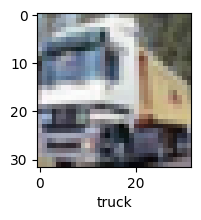

In [ ]:
plot_sample(X_train, y_train , 1)

In [ ]:
print(X_train.dtype)

uint8


In [ ]:
X_train_scaled=X_train /255
y_train_scaled=y_train /255

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10 , activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(X_train_scaled , y_train_scaled , epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 83ms/step - accuracy: 0.0996 - loss: 0.3784


In [ ]:
cnn = keras.Sequential([
    layers.Conv2D(filters=32, activation='relu',kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, activation='relu',kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10 , activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
cnn.fit(X_train_scaled , y_train_scaled , epochs=10 , verbose=True)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 33ms/step - accuracy: 0.0973 - loss: 0.1068
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.0998 - loss: 3.7099e-09
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.1015 - loss: 2.9085e-09
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.1020 - loss: 1.7230e-09
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.0985 - loss: 6.6381e-10
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.0996 - loss: 6.5608e-11
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.0984 - loss: 0.0000e+00
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.1010 - loss: 0.0000e+00
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.1011 - loss: 0.0000e+00
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.1018 - loss: 0.0000e+00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Remember to scale X_test as well
X_test_scaled = X_test / 255

# Evaluate the model on the test set
test_loss, test_acc = cnn.evaluate(X_test_scaled, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 3s - 10ms/step - accuracy: 0.1000 - loss: 296.5573

Test accuracy: 0.10000000149011612


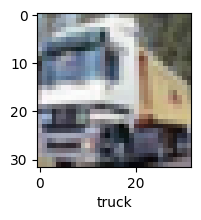

In [ ]:
plot_sample(X_train , y_train , 1)